# Denoising filter testing
## required libaries

In [1]:
import os, cv2, time, multiprocessing, tifffile
import numpy as np
import matplotlib.pyplot as plt

import functions as f

home_dir = os.path.abspath("")

## load file

In [2]:
#filepath_noisy = filedialog.askopenfilename(title='Please select the image',filetypes=[("Tiff images", "*.tif;*.tiff")])
file_name = '84d tiff'
tiff_file = home_dir + os.sep + file_name + '.tif'
CT = f.CTPreprocessor(tiff_file)

Dimensions: z = 1510, h = 1905, w = 1908 [px]


## Show the loaded images

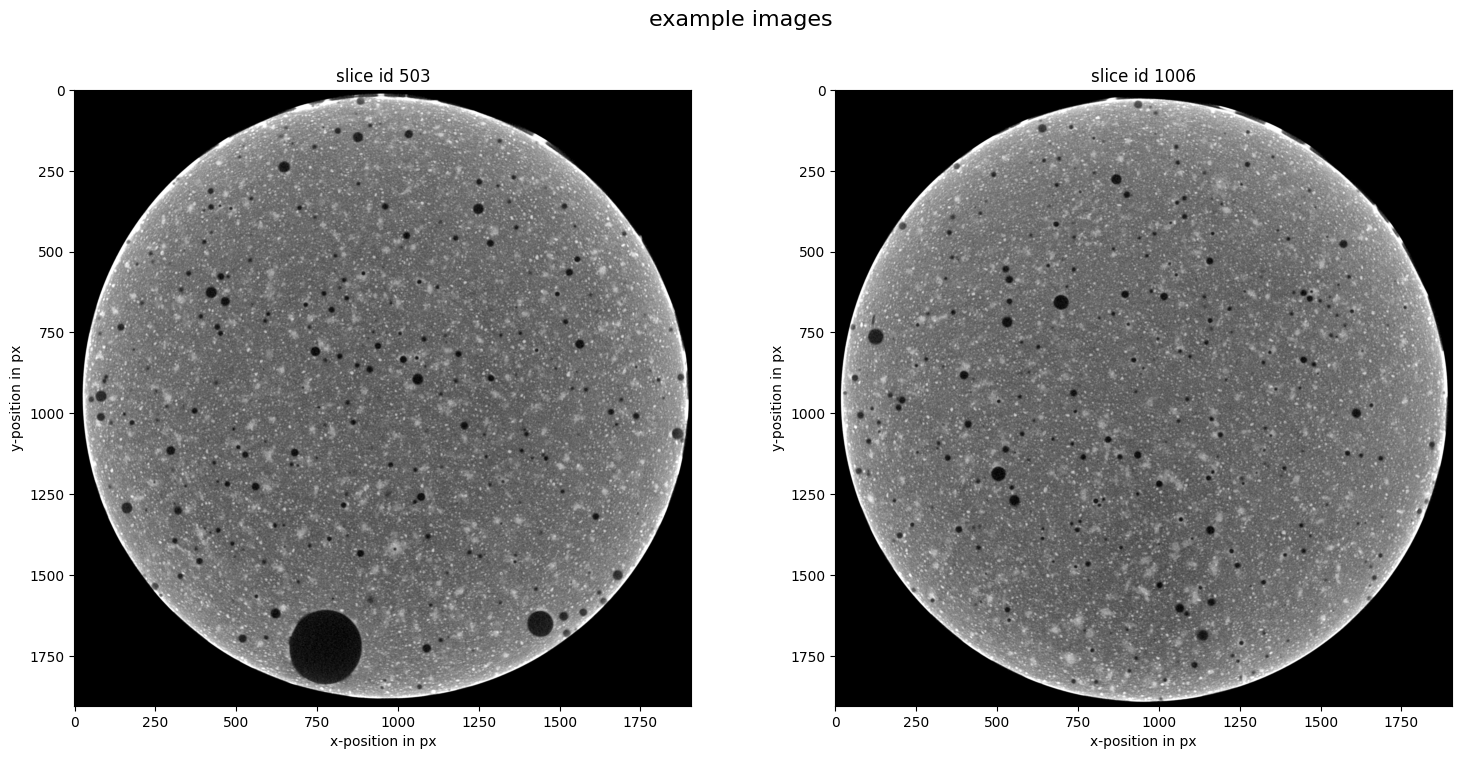

In [3]:
CT.show_example_slices()

## process the main circle, its center point and the inner pores and fix background based on individual slices

In [ ]:
CT.process_fulls_stack( verbose=True )

tifffile.imwrite( home_dir + os.sep + file_name + '_fixed.tif', CT.fixed_volume )
tifffile.imwrite( home_dir + os.sep + file_name + '_bg.tif', CT.bg_diff_volume )

In [ ]:
"""

time_start = time.time()
for i in range( CT.z ):
	#if i%100 == 0: print("slice{: 5d} of{: 5d}".format(i, CT.z))
	CT.select_slice(i)

	CT.slice.identify_main_circle(verbose=False)
	CT.slice.get_main_circle()
	CT.slice.identify_pores()
	
	circle_max_radii[i]   = CT.slice.min_length    # not really r
	circle_radii[i]   	  = CT.slice.radius    # not really r
	circle_centers[i]     = CT.slice.center
	pore_areas[i]         = CT.slice.pore_area_percent*100

	CT.slice.remove_pores()
	
	fit_data, bg_diff_volume[i], background, fixed_volume[i] = CT.fix_background( iterations= 2, verbose_level = 0 )
	#fixed_volume[i] = (CT.slice - CT.polar_to_circle( CT.fit_to_polar( fit_data, CT.polar_image ) )) * np.logical_not( CT.inner_pores )#CT.remove_pores( background = background_difference )

	if i%50 == 0:
		time_end = time.time()
		print("slice{: 5d} of{: 5d} ({:.1f} s)".format(i, CT.z, time_end-time_start))
		time_start = time_end
	if i%250 == 0:
		fig, ax = plt.subplots(1,3, figsize=(18,6))
		ax[0].imshow( CT.slice, cmap='gray' )
		ax[0].set_title( "slice{: 5d} of{: 5d}".format(i, CT.z) )
		ax[i].imshow( bg_diff_volume[i], cmap='gray' )
		ax[i].set_title( "background correction" )
		ax[i].imshow( fixed_volume[i], cmap='gray' )
		ax[2].set_title( "corrected slice" )
		plt.show()

	
circle_centers = np.swapaxes(circle_centers,0,1)

min_pore_pos = np.argmin(pore_areas)

"""

'\n\ntime_start = time.time()\nfor i in range( CT.z ):\n\t#if i%100 == 0: print("slice{: 5d} of{: 5d}".format(i, CT.z))\n\tCT.select_slice(i)\n\n\tCT.slice.identify_main_circle(verbose=False)\n\tCT.slice.get_main_circle()\n\tCT.slice.identify_pores()\n\t\n\tcircle_max_radii[i]   = CT.slice.min_length    # not really r\n\tcircle_radii[i]   \t  = CT.slice.radius    # not really r\n\tcircle_centers[i]     = CT.slice.center\n\tpore_areas[i]         = CT.slice.pore_area_percent*100\n\n\tCT.slice.remove_pores()\n\t\n\tfit_data, bg_diff_volume[i], background, fixed_volume[i] = CT.fix_background( iterations= 2, verbose_level = 0 )\n\t#fixed_volume[i] = (CT.slice - CT.polar_to_circle( CT.fit_to_polar( fit_data, CT.polar_image ) )) * np.logical_not( CT.inner_pores )#CT.remove_pores( background = background_difference )\n\n\tif i%50 == 0:\n\t\ttime_end = time.time()\n\t\tprint("slice{: 5d} of{: 5d} ({:.1f} s)".format(i, CT.z, time_end-time_start))\n\t\ttime_start = time_end\n\tif i%250 == 0:\n\t\

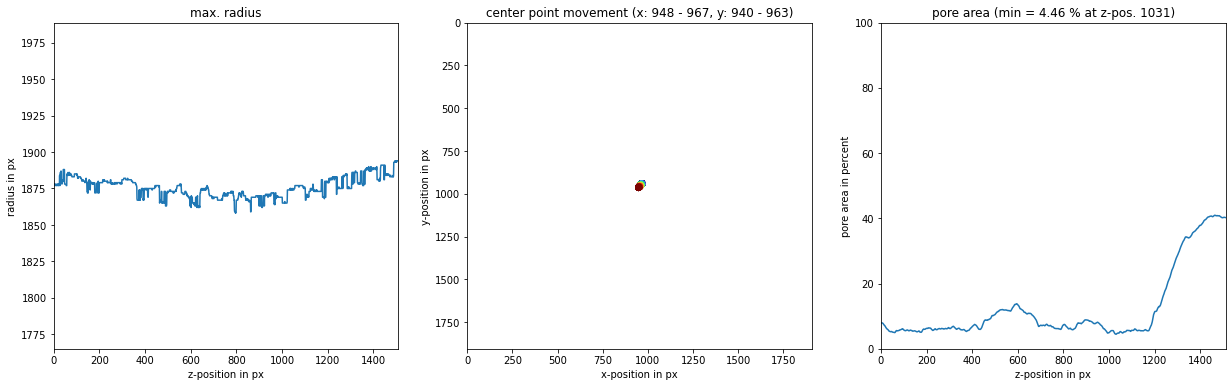

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(21,6))
i = 0 
ax[i].plot( range(CT.z), CT.circle_max_radii )
ax[i].set_xlim((0, CT.z))
ax[i].set_ylim((CT.circle_max_radii.min()*0.95, CT.circle_max_radii.max()*1.05))
ax[i].set_title( "max. radius" )
ax[i].set_xlabel("z-position in {}".format(CT.unit))
ax[i].set_ylabel("radius in {}".format(CT.unit))
i += 1
ax[i].plot( range(CT.z), CT.circle_radii )
ax[i].set_xlim((0, CT.z))
ax[i].set_ylim((CT.circle_radii.min()*0.95, CT.circle_radii.max()*1.05))
ax[i].set_title( "radius" )
ax[i].set_xlabel("z-position in {}".format(CT.unit))
ax[i].set_ylabel("radius in {}".format(CT.unit))
i += 1
ax[i].scatter(CT.circle_centers[0], CT.circle_centers[1], c=range(CT.z), cmap='turbo')
ax[i].set_xlim((0, CT.w))
ax[i].set_ylim((CT.h, 0))
ax[i].set_title( "center point movement (x: {:d} - {:d}, y: {:d} - {:d})".format(CT.circle_centers[0].min(), CT.circle_centers[0].max(), CT.circle_centers[1].min(), CT.circle_centers[1].max()) )
ax[i].set_xlabel("x-position in {}".format(CT.unit))
ax[i].set_ylabel("y-position in {}".format(CT.unit))
i += 1
ax[i].plot( range(CT.z), CT.pore_areas )
ax[i].set_title( "pore area (min = {:.2f} % at z-pos. {:d})".format(CT.pore_areas[CT.min_pore_pos], CT.min_pore_pos) )
ax[i].set_xlim((0, CT.z))
ax[i].set_ylim((0, 100))
ax[i].set_xlabel("z-position in {}".format(CT.unit))
ax[i].set_ylabel("pore area in percent")

plt.show()

In [ ]:
raise SystemExit('Stopping execution')

SystemExit: Stopping execution

C:\Users\Florian Kleiner\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# process stack based on a single background fix
- delivers inconsistent results

In [ ]:
CT.select_slice(min_pore_pos)

CT.identify_main_circle(verbose=False)
CT.get_main_circle()

CT.identify_pores()
CT.remove_pores();

found the center point at (954, 956). The circle has a maximum radius of 949 px.


In [ ]:
fit_data, background_difference, background, fixed = CT.fix_background( iterations= 3, verbose_level = 0 )

e:\GIT\CT_edge_hardening_remover\functions.py:16: RuntimeWarning: overflow encountered in power
  return c + d**(d**((x-x0)/b))


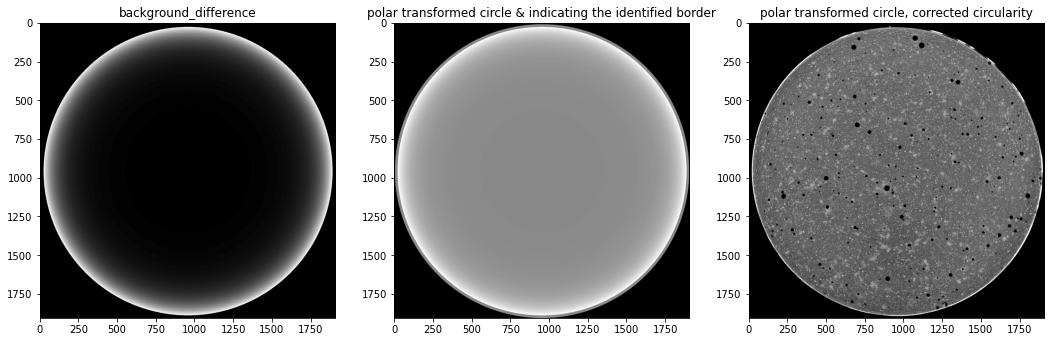

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow( background_difference, cmap='gray' )
ax[0].set_title( "background_difference" )
ax[1].imshow( background, cmap='gray' )
ax[1].set_title( "polar transformed circle & indicating the identified border" )
ax[2].imshow( fixed, cmap='gray' )
ax[2].set_title( "polar transformed circle, corrected circularity" )
plt.show()

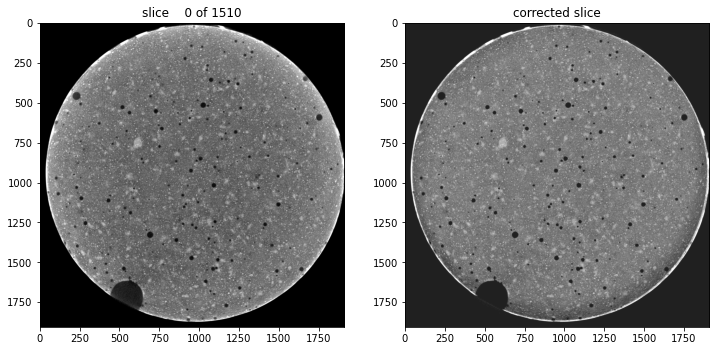

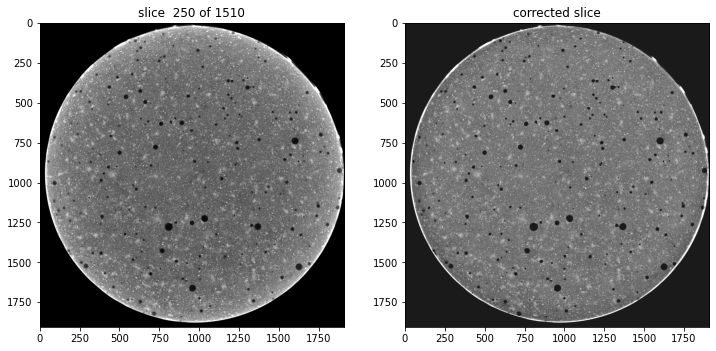

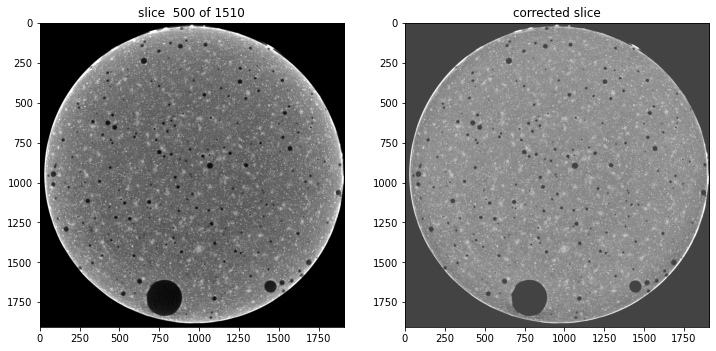

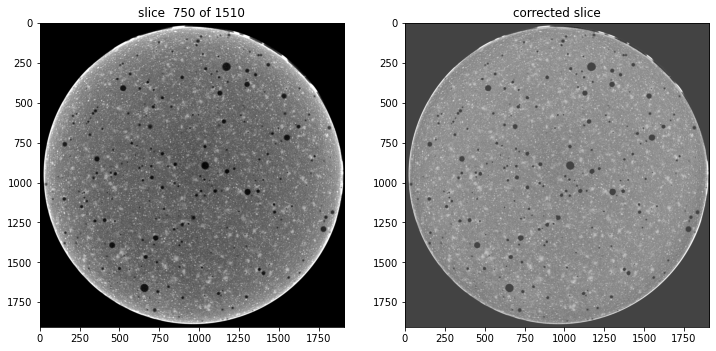

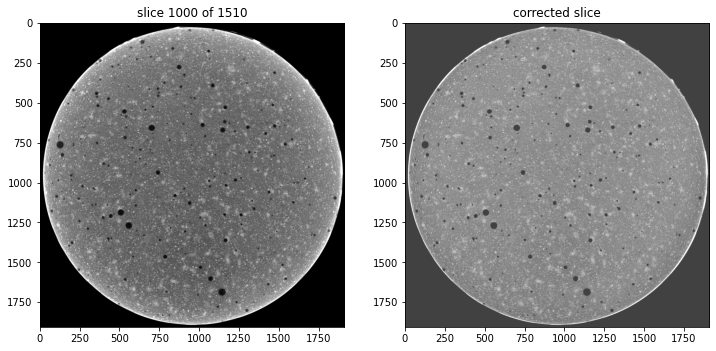

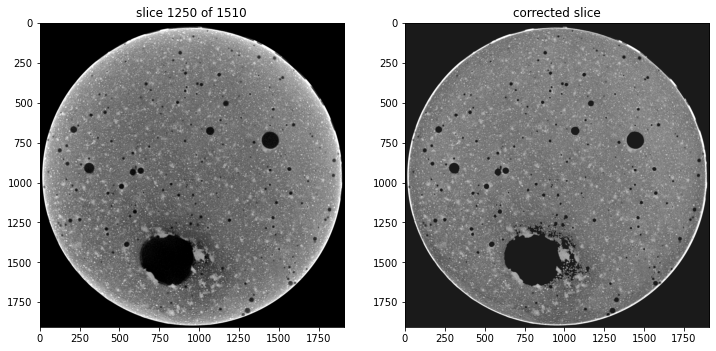

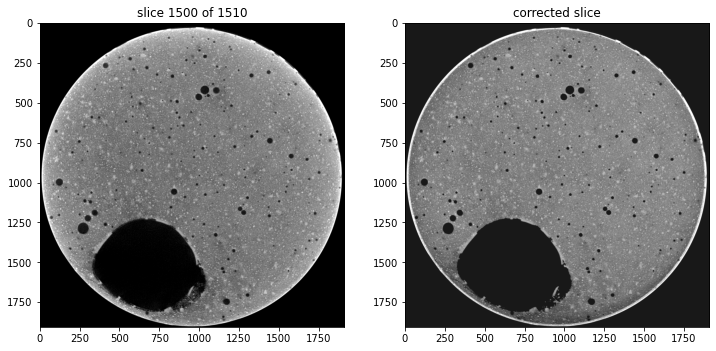

: 

In [ ]:
# polar_background
fixed_volume = np.empty(shape=CT.dataset.shape)
for i in range( CT.z ):
	CT.select_slice(i)
	CT.identify_main_circle(verbose=False)
	CT.get_main_circle()
	CT.identify_pores()
	
	fixed_volume[i] = (CT.slice - CT.polar_to_circle( CT.fit_to_polar( fit_data, CT.polar_image ) )) * np.logical_not( CT.inner_pores )#CT.remove_pores( background = background_difference )

	if i%50 == 0: print("slice{: 5d} of{: 5d}".format(i, CT.z))
	if i%250 == 0:
		fig, ax = plt.subplots(1,2, figsize=(12,6))
		ax[0].imshow( CT.slice, cmap='gray' )
		ax[0].set_title( "slice{: 5d} of{: 5d}".format(i, CT.z) )
		ax[1].imshow( fixed_volume[i], cmap='gray' )
		ax[1].set_title( "corrected slice" )
		plt.show()